IMPORT LIBRARIES

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

READ FILES

In [143]:
path_e = "C:\\Users\\jalbe\\OneDrive\\Documentos\\GITHUB\\Proyecto Escuelas SIGED\\ESTANDAR_BASICA_I2425.txt"
escuelas = pd.read_csv(path_e, delimiter="\t",encoding='utf-16')
path_p = "C:\\Users\\jalbe\\OneDrive\\Documentos\\GITHUB\\Proyecto Escuelas SIGED\\pobproy_quinq1.csv"
poblacion = pd.read_csv(path_p, delimiter=",")

CLEAN DATA

In [144]:
#Select relevant columns
escuelas = escuelas[['N_ENTIDAD','INSC_T']]
poblacion = poblacion[['NOM_ENT','ANO','POB_00_04','POB_05_09','POB_010_014']][(poblacion['ANO'] == 2024)]
#Create a column with the sum of POB_00_04, POB_05_09 and POB_010_014
poblacion['POB_BASICA'] = poblacion['POB_00_04']+poblacion['POB_05_09'] + poblacion['POB_010_014']
#Change NOM_ENT to uppercase
poblacion['NOM_ENT'] = poblacion['NOM_ENT'].str.upper()

In [145]:
#Group by state
escuelas_estado = escuelas.groupby('N_ENTIDAD').sum()
poblacion_estado = poblacion.groupby('NOM_ENT').sum().drop(columns=['ANO'])

In [146]:
#Merge poblacion_estado and escuelas_estado
data = pd.merge(poblacion_estado, escuelas_estado, left_index=True, right_index=True)
#Create ratio column
data['RATIO'] = data['INSC_T'] / data['POB_BASICA']

PLOT GRAPHS

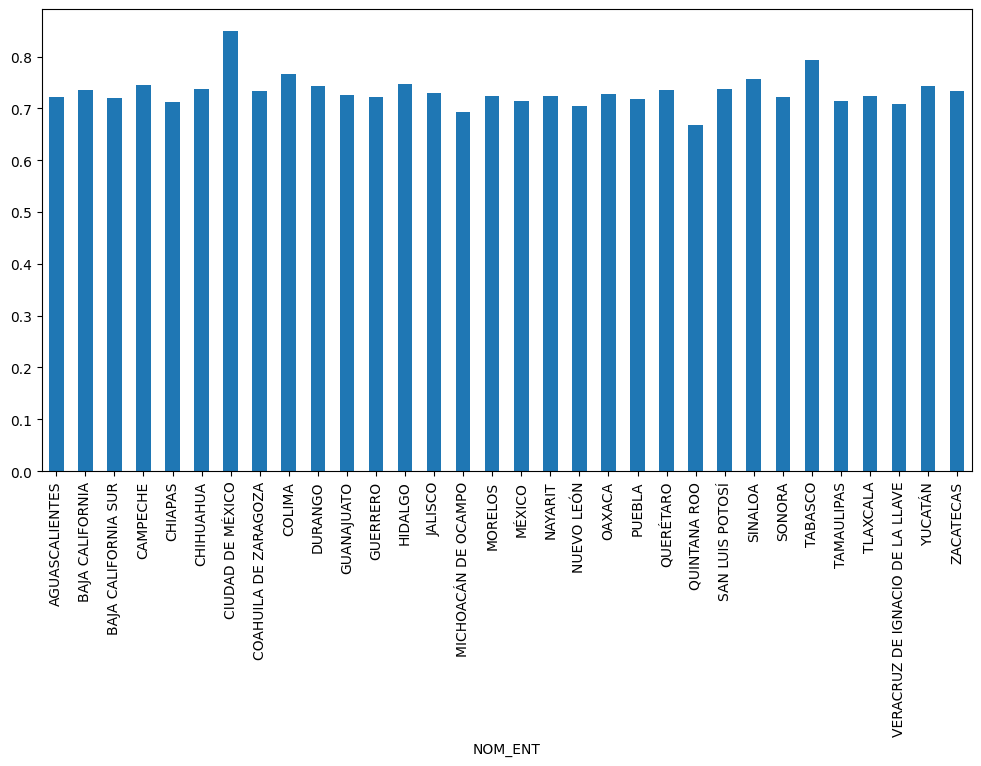

In [147]:
#Plot RATIO
data['RATIO'].plot(kind='bar', figsize=(12,6))
plt.show()

In [148]:
#Download Mexico states geojson
url = "https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson"
mex_gdf = gpd.read_file(url)
mex_gdf['state'] = mex_gdf['state'].str.upper()
mex_gdf['state'][mex_gdf['state'] == 'DISTRITO FEDERAL'] = 'CIUDAD DE MÉXICO'

C:\Users\jalbe\AppData\Local\Temp\ipykernel_10788\3083090014.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  mex_gdf['state'][mex_gdf['state'] == 'DISTRITO FEDERAL'] = 'CIUDAD DE MÉXICO'
C:\Users\jalbe\AppData\Local\Temp\ipykernel_10788\

In [149]:
merged_gdf = mex_gdf.merge(data, left_on='state', right_index=True)

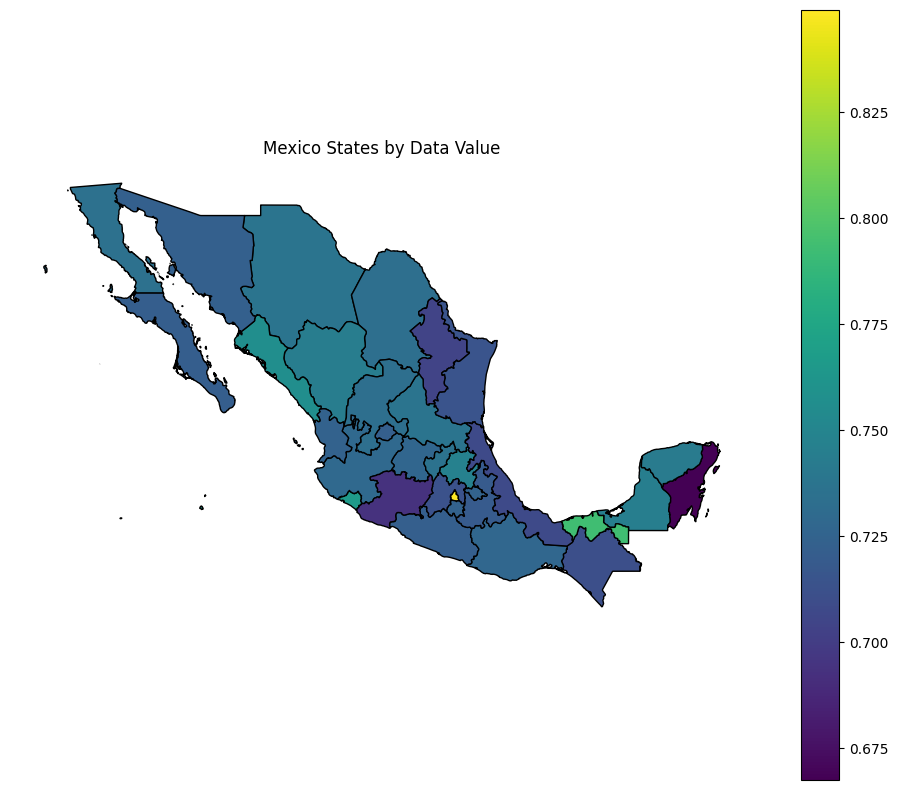

In [150]:
#Plot Mexico map with RATIO
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_gdf.plot(column='RATIO', # Use 'geometry' for boundaries only
                ax=ax,
                legend=True,
                cmap='viridis', # Color map
                edgecolor='black', # State borders
                missing_kwds={"color": "lightgrey"} # For missing data
               )
ax.set_title("Mexico States by Data Value")
ax.set_axis_off() # Hide axes
plt.show()